1. Laden der Bibliotheken


In [23]:
#Laden der benötigten Bibliotheken
import math
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pickle 
import random
import seaborn as sns
import scipy
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform, randint, chi2_contingency
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import tqdm
from tqdm import tnrange, tqdm_notebook





2. Einlesen der Daten

In [24]:
#Datensatz einlesen
data = pd.read_csv('../data/stroke_data.csv')
# Datensatz heruntergeladen von Kaggle --> Stroke Prediction
# https://www.kaggle.com/datasets/prosperchuks/health-dataset?resource=download

3. Vorbereiten der Daten

In [25]:
#Check auf Dubletten --> Keine Dubletten vorhanden. 
data.duplicated().sum()

0

In [26]:
#Überblick verschaffen über die Daten und deren Datentyp
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [27]:
#Check nach Nullwerten
data.isnull().sum().sort_values(ascending=False)
#Es gibt systemseitig 3 Nullwerte bei der Angabe Geschlecht

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [28]:
#Bereinigung der Nullwerte (NaN)
data = data.dropna()

In [29]:
data.isnull().sum().sort_values(ascending=False)
#Nun sind die Nullwerte-Zeilen aus dem Datensatz entfernt

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [30]:
#Überblick über die Verteilung der Daten
data.describe().T
#Der Datensatz hat 40.907 Zeilen und 11 Spalten
#Auffaellig: 
# age min -9 und sehr hohe Streuung

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40907.0,51.327303,21.624171,-9.00,35.00,52.00,68.00,103.00
hypertension,40907.0,0.213851,0.410028,0.00,0.00,0.00,0.00,1.00
heart_disease,40907.0,0.127729,0.333792,0.00,0.00,0.00,0.00,1.00
ever_married,40907.0,0.821326,0.383083,0.00,1.00,1.00,1.00,1.00
work_type,40907.0,3.461095,0.780934,0.00,3.00,4.00,4.00,4.00
Residence_type,40907.0,0.514851,0.499786,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40907.0,122.079679,57.561951,55.12,78.75,97.92,167.59,271.74
bmi,40907.0,30.406488,6.835305,11.50,25.90,29.40,34.10,92.00
smoking_status,40907.0,0.488572,0.499875,0.00,0.00,0.00,1.00,1.00


In [31]:
print(data.shape)


(40907, 11)


In [32]:
#Zeilen Löschen mit negativen Altersangaben
data = data[data['age'] > 0]
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40826.0,0.554891,0.496984,0.00,0.00,1.000,1.00,1.00
age,40826.0,51.433033,21.514646,1.00,35.00,52.000,68.00,103.00
hypertension,40826.0,0.213565,0.409828,0.00,0.00,0.000,0.00,1.00
heart_disease,40826.0,0.127639,0.333692,0.00,0.00,0.000,0.00,1.00
ever_married,40826.0,0.821266,0.383134,0.00,1.00,1.000,1.00,1.00
work_type,40826.0,3.460883,0.781131,0.00,3.00,4.000,4.00,4.00
Residence_type,40826.0,0.514697,0.499790,0.00,0.00,1.000,1.00,1.00
avg_glucose_level,40826.0,122.065061,57.552075,55.12,78.75,97.935,167.41,271.74
bmi,40826.0,30.406021,6.835524,11.50,25.90,29.400,34.10,92.00
smoking_status,40826.0,0.488782,0.499880,0.00,0.00,0.000,1.00,1.00


In [33]:
print(data.shape)

(40826, 11)


4.  Statistische Kennzahlen und Explorative Datenanalyse 

In [34]:
#Check nach Verteilung der Damen/Herren im Datensatz

f = data[data['sex']==0]['sex'].count()
m = data[data['sex']==1]['sex'].count()
frauen_mit_schlaganfall = data[(data['sex'] == 0) & (data['stroke'] == 1)]
anzahl_frauen_mit_schlaganfall = len(frauen_mit_schlaganfall)
maenner_mit_schlaganfall = data[(data['sex'] == 1) & (data['stroke'] == 1)]
anzahl_maenner_mit_schlaganfall = len(maenner_mit_schlaganfall)

print("Anzahl an Frauen", f)
print("Anzahl an Männer", m)
anteil = f / (m+f)
print('Anteil an Frauen:', int(anteil*100), '%')
print("Frauen mit Schlaganfall",anzahl_frauen_mit_schlaganfall)
print("Männer mit Schlaganfall",anzahl_maenner_mit_schlaganfall)

Anzahl an Frauen 18172
Anzahl an Männer 22654
Anteil an Frauen: 44 %
Frauen mit Schlaganfall 10205
Männer mit Schlaganfall 10174


In [35]:
anzahl_mit_schlaganfall = (data['stroke'] == 1).sum()
print(data['stroke'].value_counts()[1])

print("Anzahl der Menschen mit Schlaganfall:", anzahl_mit_schlaganfall)


20379
Anzahl der Menschen mit Schlaganfall: 20379


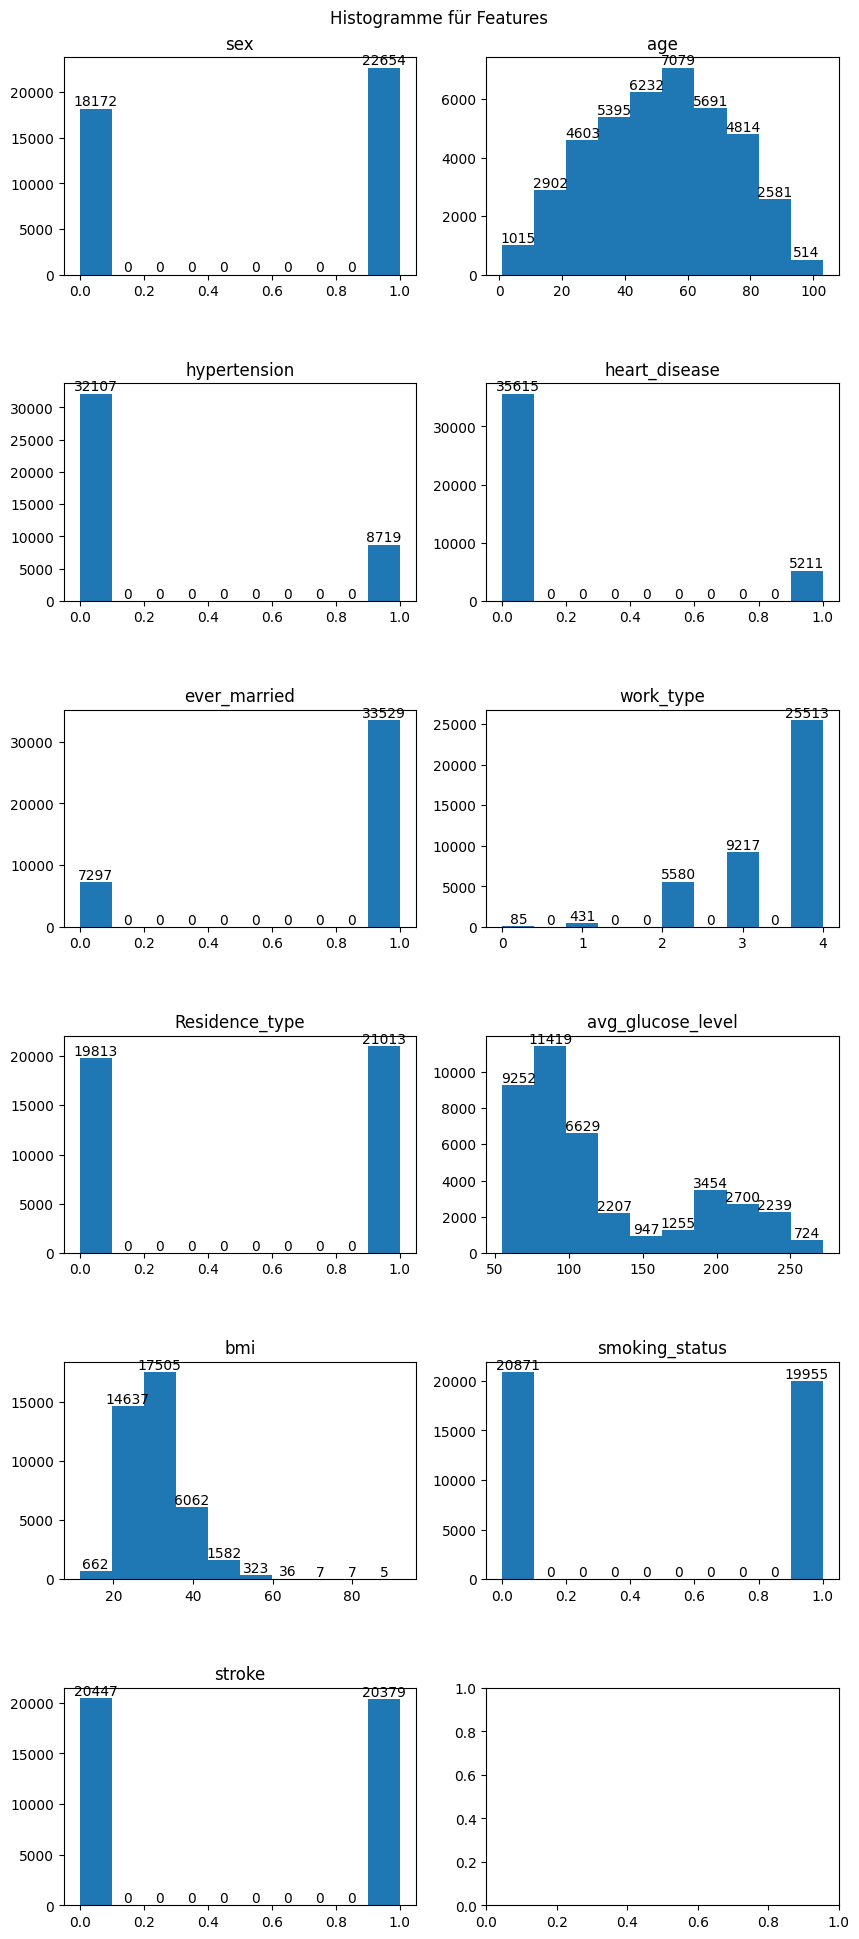

In [36]:
#Plotten der Subplots als Übersicht über Datensatz
num_columns = len(data.columns)  #Anzahl an Spalten 
num_rows = math.ceil(num_columns / 2)  #Benötigte Anzahl an Zeilen
fig, axs = plt.subplots(num_rows, 2, figsize=(10,4*num_rows), 
                        gridspec_kw = {'hspace':0.5, 'wspace': 0.2})
fig.suptitle('Histogramme für Features', y = 0.9)
axs = axs.flatten()


for i in range(len(data.columns)):
    axs[i].hist(data[data.columns[i]])
    axs[i].set_title(data.columns[i])
    
    for j, patch in enumerate(axs[i].patches):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        axs[i].text(x, y, str(int(y)), ha='center', va='bottom')

plt.show()

In [37]:
#Überblick über statistische Kennzahlen
data.corr()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
sex,1.000000,-0.114671,-0.039458,-0.045572,-0.026237,0.002976,0.003754,-0.039474,-0.006075,-0.027988,-0.111795
age,-0.114671,1.000000,0.016228,0.025383,0.006724,0.004327,0.003478,0.028096,-0.012241,-0.003123,0.063873
hypertension,-0.039458,0.016228,1.000000,0.080084,0.033911,-0.033012,-0.002707,0.203391,0.082594,-0.017539,0.257093
heart_disease,-0.045572,0.025383,0.080084,1.000000,0.071729,0.049650,0.013206,0.252419,0.021240,0.136708,0.224154
ever_married,-0.026237,0.006724,0.033911,0.071729,1.000000,0.051814,-0.057213,0.160179,0.113732,0.137442,0.181877
work_type,0.002976,0.004327,-0.033012,0.049650,0.051814,1.000000,-0.011452,0.018509,0.074755,0.053139,0.026320
Residence_type,0.003754,0.003478,-0.002707,0.013206,-0.057213,-0.011452,1.000000,0.016757,0.037485,0.017867,0.011468
avg_glucose_level,-0.039474,0.028096,0.203391,0.252419,0.160179,0.018509,0.016757,1.000000,0.242651,0.056975,0.265722
bmi,-0.006075,-0.012241,0.082594,0.021240,0.113732,0.074755,0.037485,0.242651,1.000000,0.042705,0.018275
smoking_status,-0.027988,-0.003123,-0.017539,0.136708,0.137442,0.053139,0.017867,0.056975,0.042705,1.000000,0.069005


In [38]:
#Überblick über Daten
print(data)


       sex   age  hypertension  heart_disease  ever_married  work_type  \
0      1.0  63.0             0              1             1          4   
1      1.0  42.0             0              1             1          4   
2      0.0  61.0             0              0             1          4   
3      1.0  41.0             1              0             1          3   
4      1.0  85.0             0              0             1          4   
...    ...   ...           ...            ...           ...        ...   
40905  1.0  38.0             0              0             0          4   
40906  0.0  53.0             0              0             1          4   
40907  1.0  32.0             0              0             1          2   
40908  1.0  42.0             0              0             1          3   
40909  1.0  35.0             0              0             0          4   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                   1             228.

<Axes: >

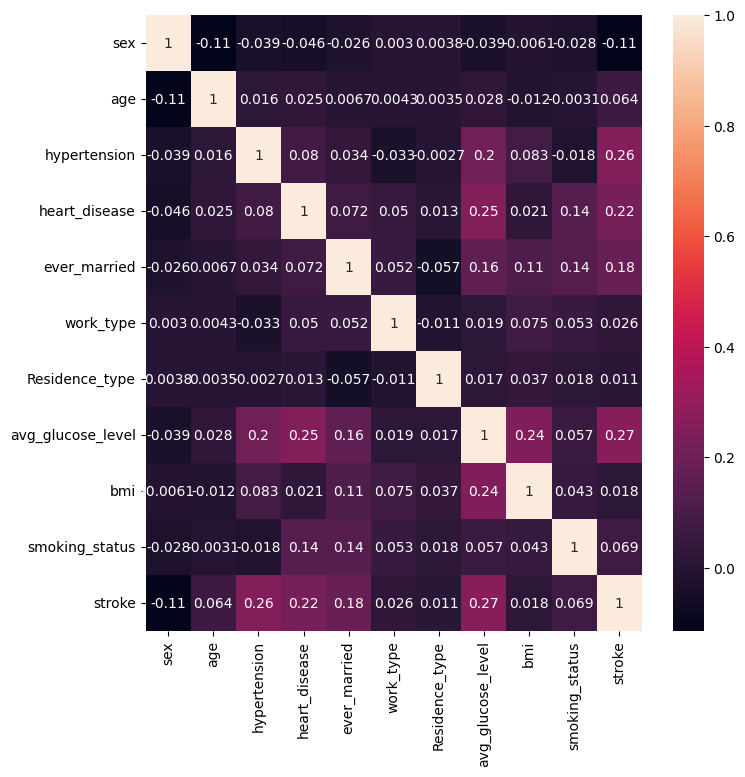

In [39]:
#Plotten von heatmap für Korrelationen
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
#die drei Faktoren "Glucose Level", "Hypertension" und "Heart Disease" scheinen den größten Einfluss zu besitzen 

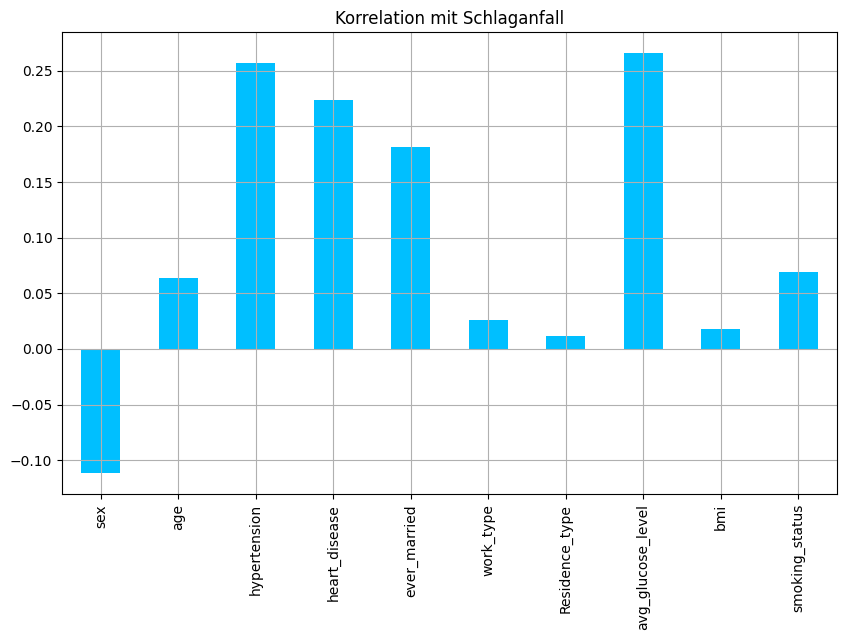

In [40]:
#check Korrelation der Merkmale mit Schlaganfall
data.drop('stroke', axis=1).corrwith(data.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Korrelation mit Schlaganfall",color="deepskyblue");


In [41]:
#Check auf Verteilung zwischen Schlaganfall Ja(1)/Nein(0)
data.groupby(['stroke']).size()


stroke
0    20447
1    20379
dtype: int64

In [42]:
print(data.shape)

(40826, 11)


In [43]:
#Cross-Check ob Effekt unterschiedlich bei Frauen und Männern
data_female = data.loc[data.loc[:,'sex']==0,:]
data_female = data_female.drop(columns=['sex'])
data_male = data.loc[data.loc[:,'sex']==1,:]
data_male = data_male.drop(columns=['sex'])


In [44]:
print(data)

       sex   age  hypertension  heart_disease  ever_married  work_type  \
0      1.0  63.0             0              1             1          4   
1      1.0  42.0             0              1             1          4   
2      0.0  61.0             0              0             1          4   
3      1.0  41.0             1              0             1          3   
4      1.0  85.0             0              0             1          4   
...    ...   ...           ...            ...           ...        ...   
40905  1.0  38.0             0              0             0          4   
40906  0.0  53.0             0              0             1          4   
40907  1.0  32.0             0              0             1          2   
40908  1.0  42.0             0              0             1          3   
40909  1.0  35.0             0              0             0          4   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                   1             228.

<Axes: title={'center': 'Heatmap für Herren'}>

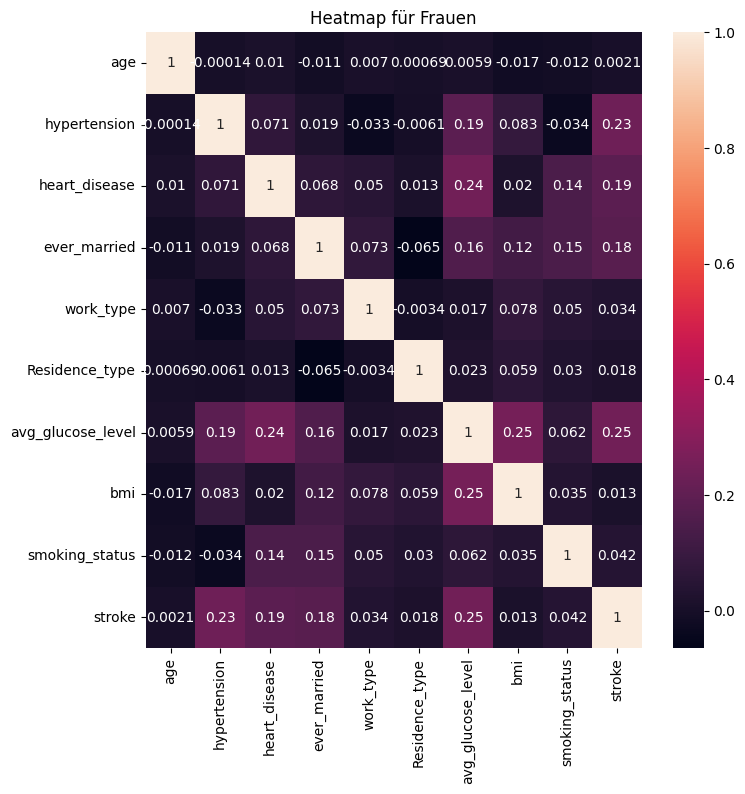

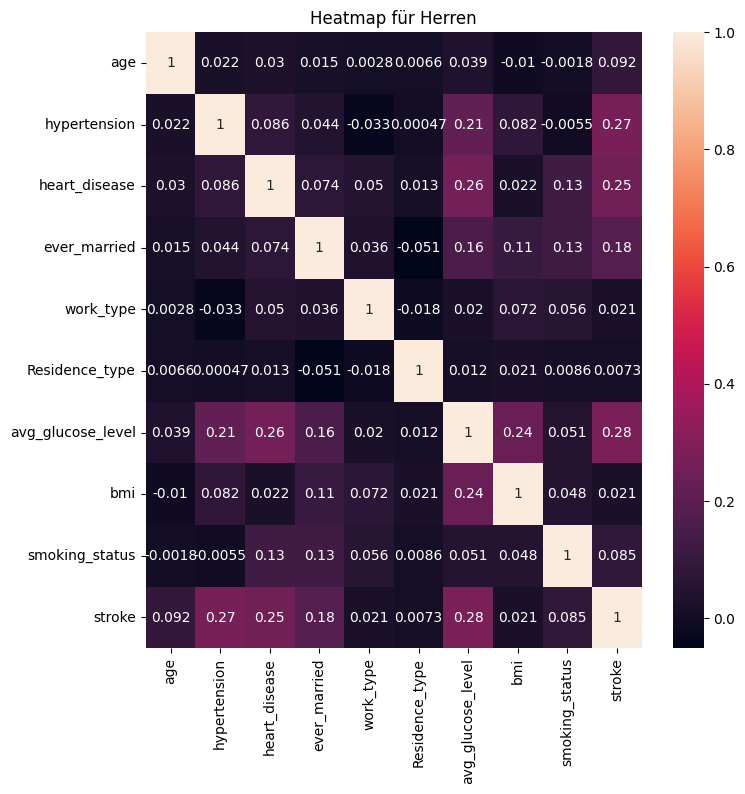

In [45]:
#heatmap pro Geschlecht für Überprüfung 2. Arbeitsthese
plt.figure(figsize=(8,8))
plt.title("Heatmap für Frauen")
sns.heatmap(data_female.corr(), annot=True)
plt.figure(figsize=(8,8))
plt.title("Heatmap für Herren")
sns.heatmap(data_male.corr(), annot=True)

#Die relevanten Features sind die gleichen, aber bei Herren ist die Korrelation ausgeprägter als bei Frauen. 

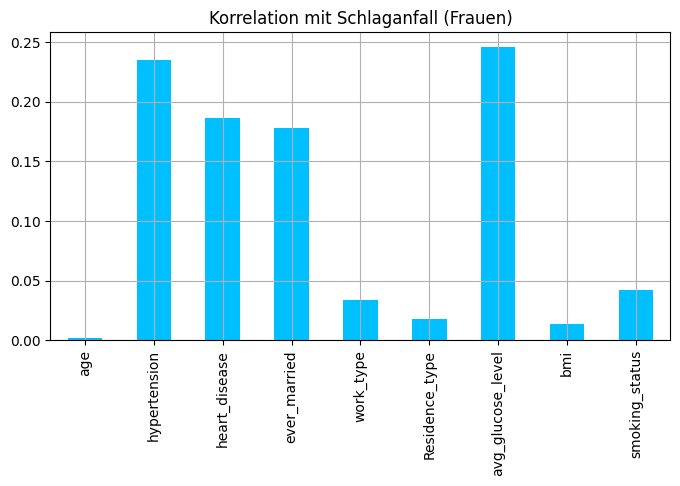

In [46]:
#Separater Korrelationscheck für Frauen und Männer
#Frauen
data_female.drop('stroke', axis=1).corrwith(data_female.stroke).plot(kind='bar', grid=True, figsize=(8, 4), 
                                                       title="Korrelation mit Schlaganfall (Frauen)",color="deepskyblue");


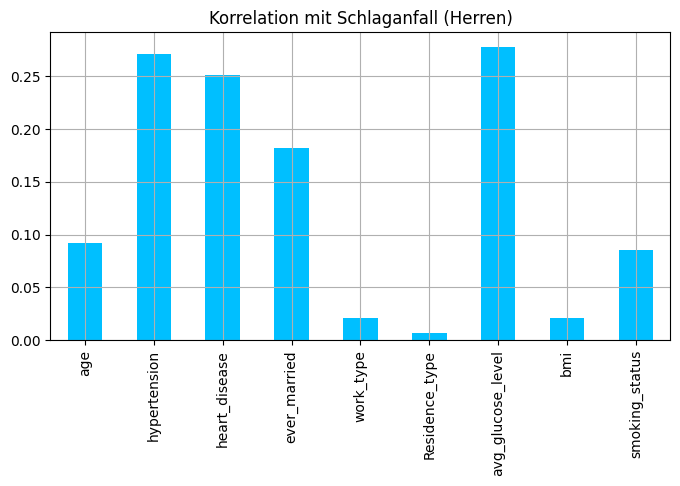

In [47]:
#Männer
data_male.drop('stroke', axis=1).corrwith(data_male.stroke).plot(kind='bar', grid=True, figsize=(8, 4), 
                                                       title="Korrelation mit Schlaganfall (Herren)",color="deepskyblue");


Text(0.5, 1.0, 'Koviariaten')

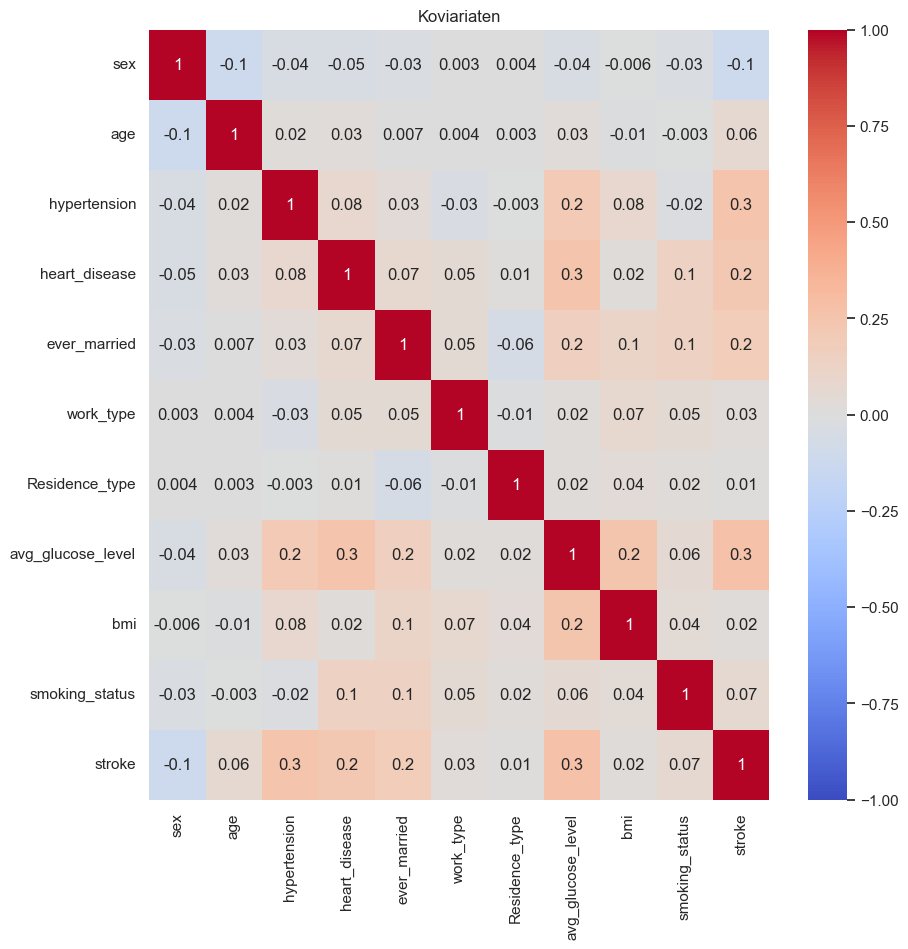

In [48]:
#check auf mögliche Kofaktoren 
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data.corr(), vmin = -1, annot = True, fmt = '.1g', cmap = 'coolwarm')
plt.title("Koviariaten")


In [49]:
#Überlegung: Entfernen derjenigen Spalten die niedrige Korrelationen mit der Zielspalte haben
#data_red = data.drop(['Residence_type', 'smoking_status', 'bmi','work_type', 'age'],axis = 1, inplace = True)

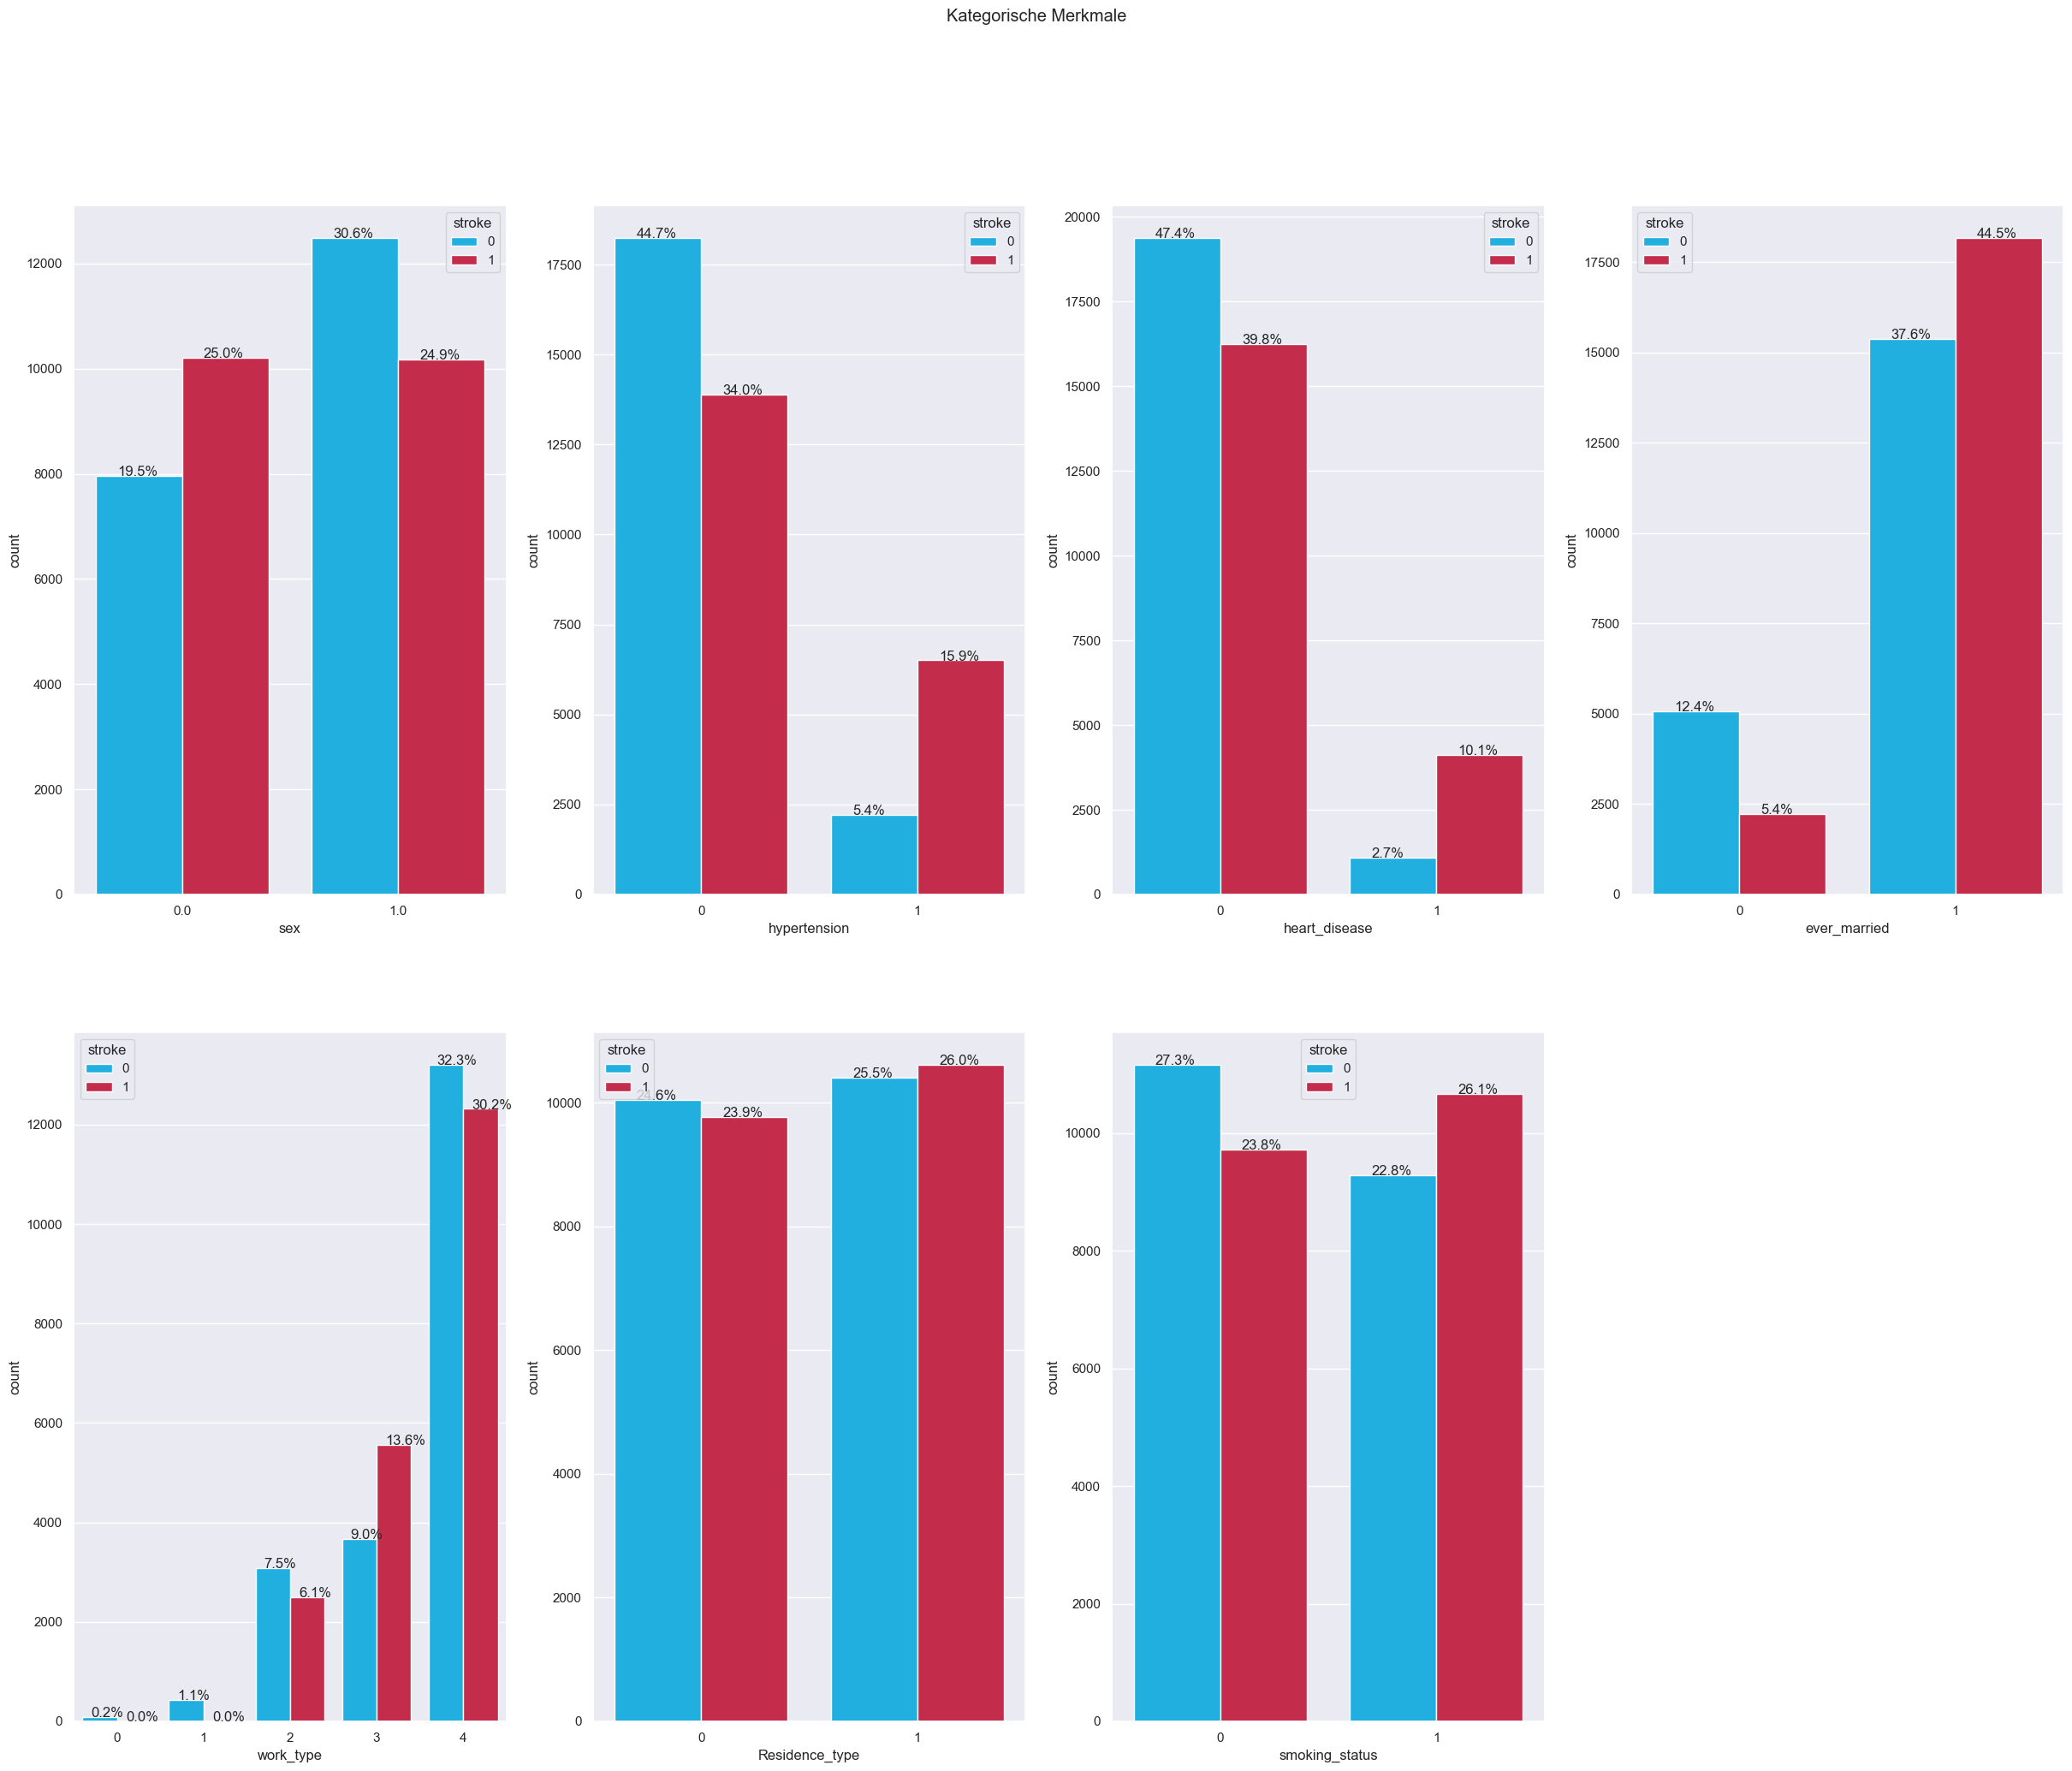

In [50]:
# Bivariate Balkendiagramme für kategorische Merkmale 

features = [x for x in data.columns if x not in ['avg_glucose_level','stroke', 'age', 'bmi']]
plt.figure(figsize = (30,23))
plt.suptitle('Kategorische Merkmale')

#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)   
    x = sns.countplot(data=data, x=i[1], hue='stroke', palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/data.shape[0])*100)+'%',(z.get_x()+0.1, z.get_height()+0.01))

<Figure size 1200x500 with 0 Axes>

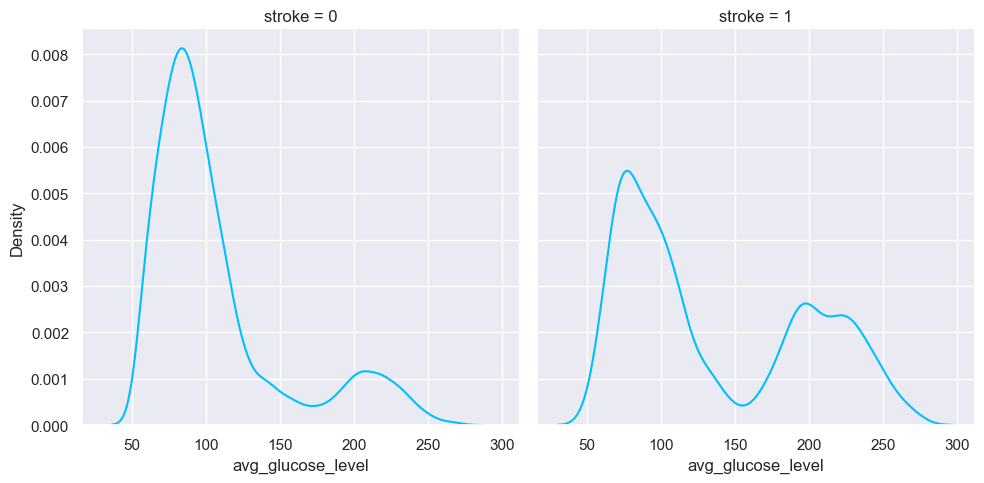

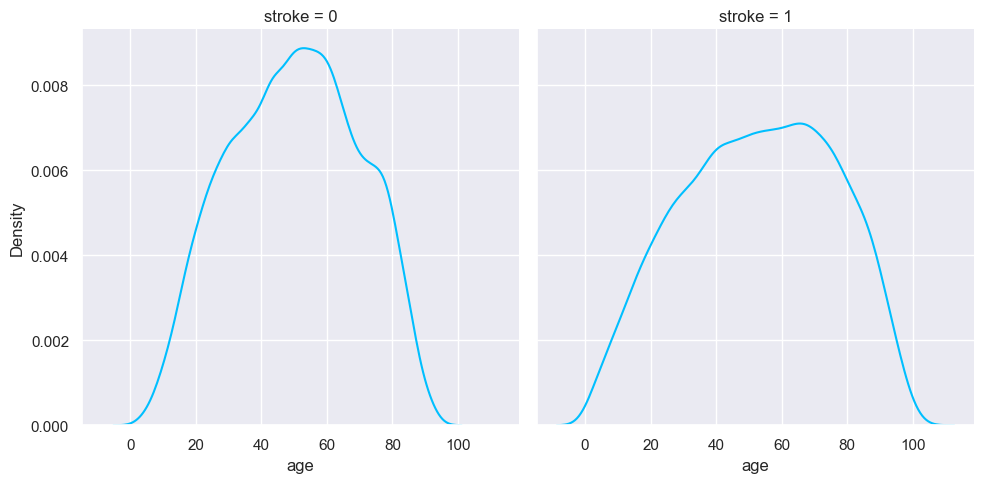

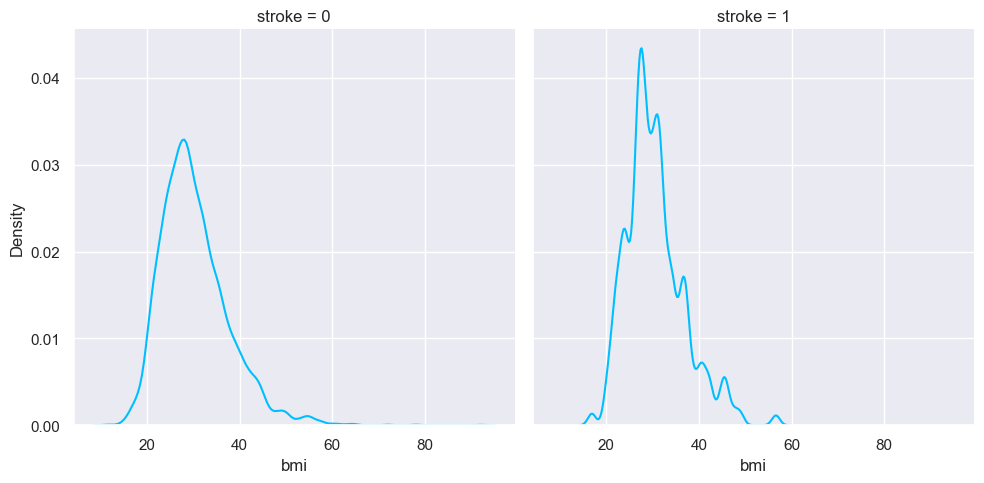

In [51]:
#Bivariate Subplots für numerische Variablen
plt.figure(figsize=(12,5))
sns.displot(x='avg_glucose_level', col='stroke' , data = data, kind="kde" ,color = 'deepskyblue')
sns.displot(x='age', col='stroke' , data = data, kind="kde" ,color = 'deepskyblue')
sns.displot(x='bmi', col='stroke' , data = data, kind="kde" ,color = 'deepskyblue')

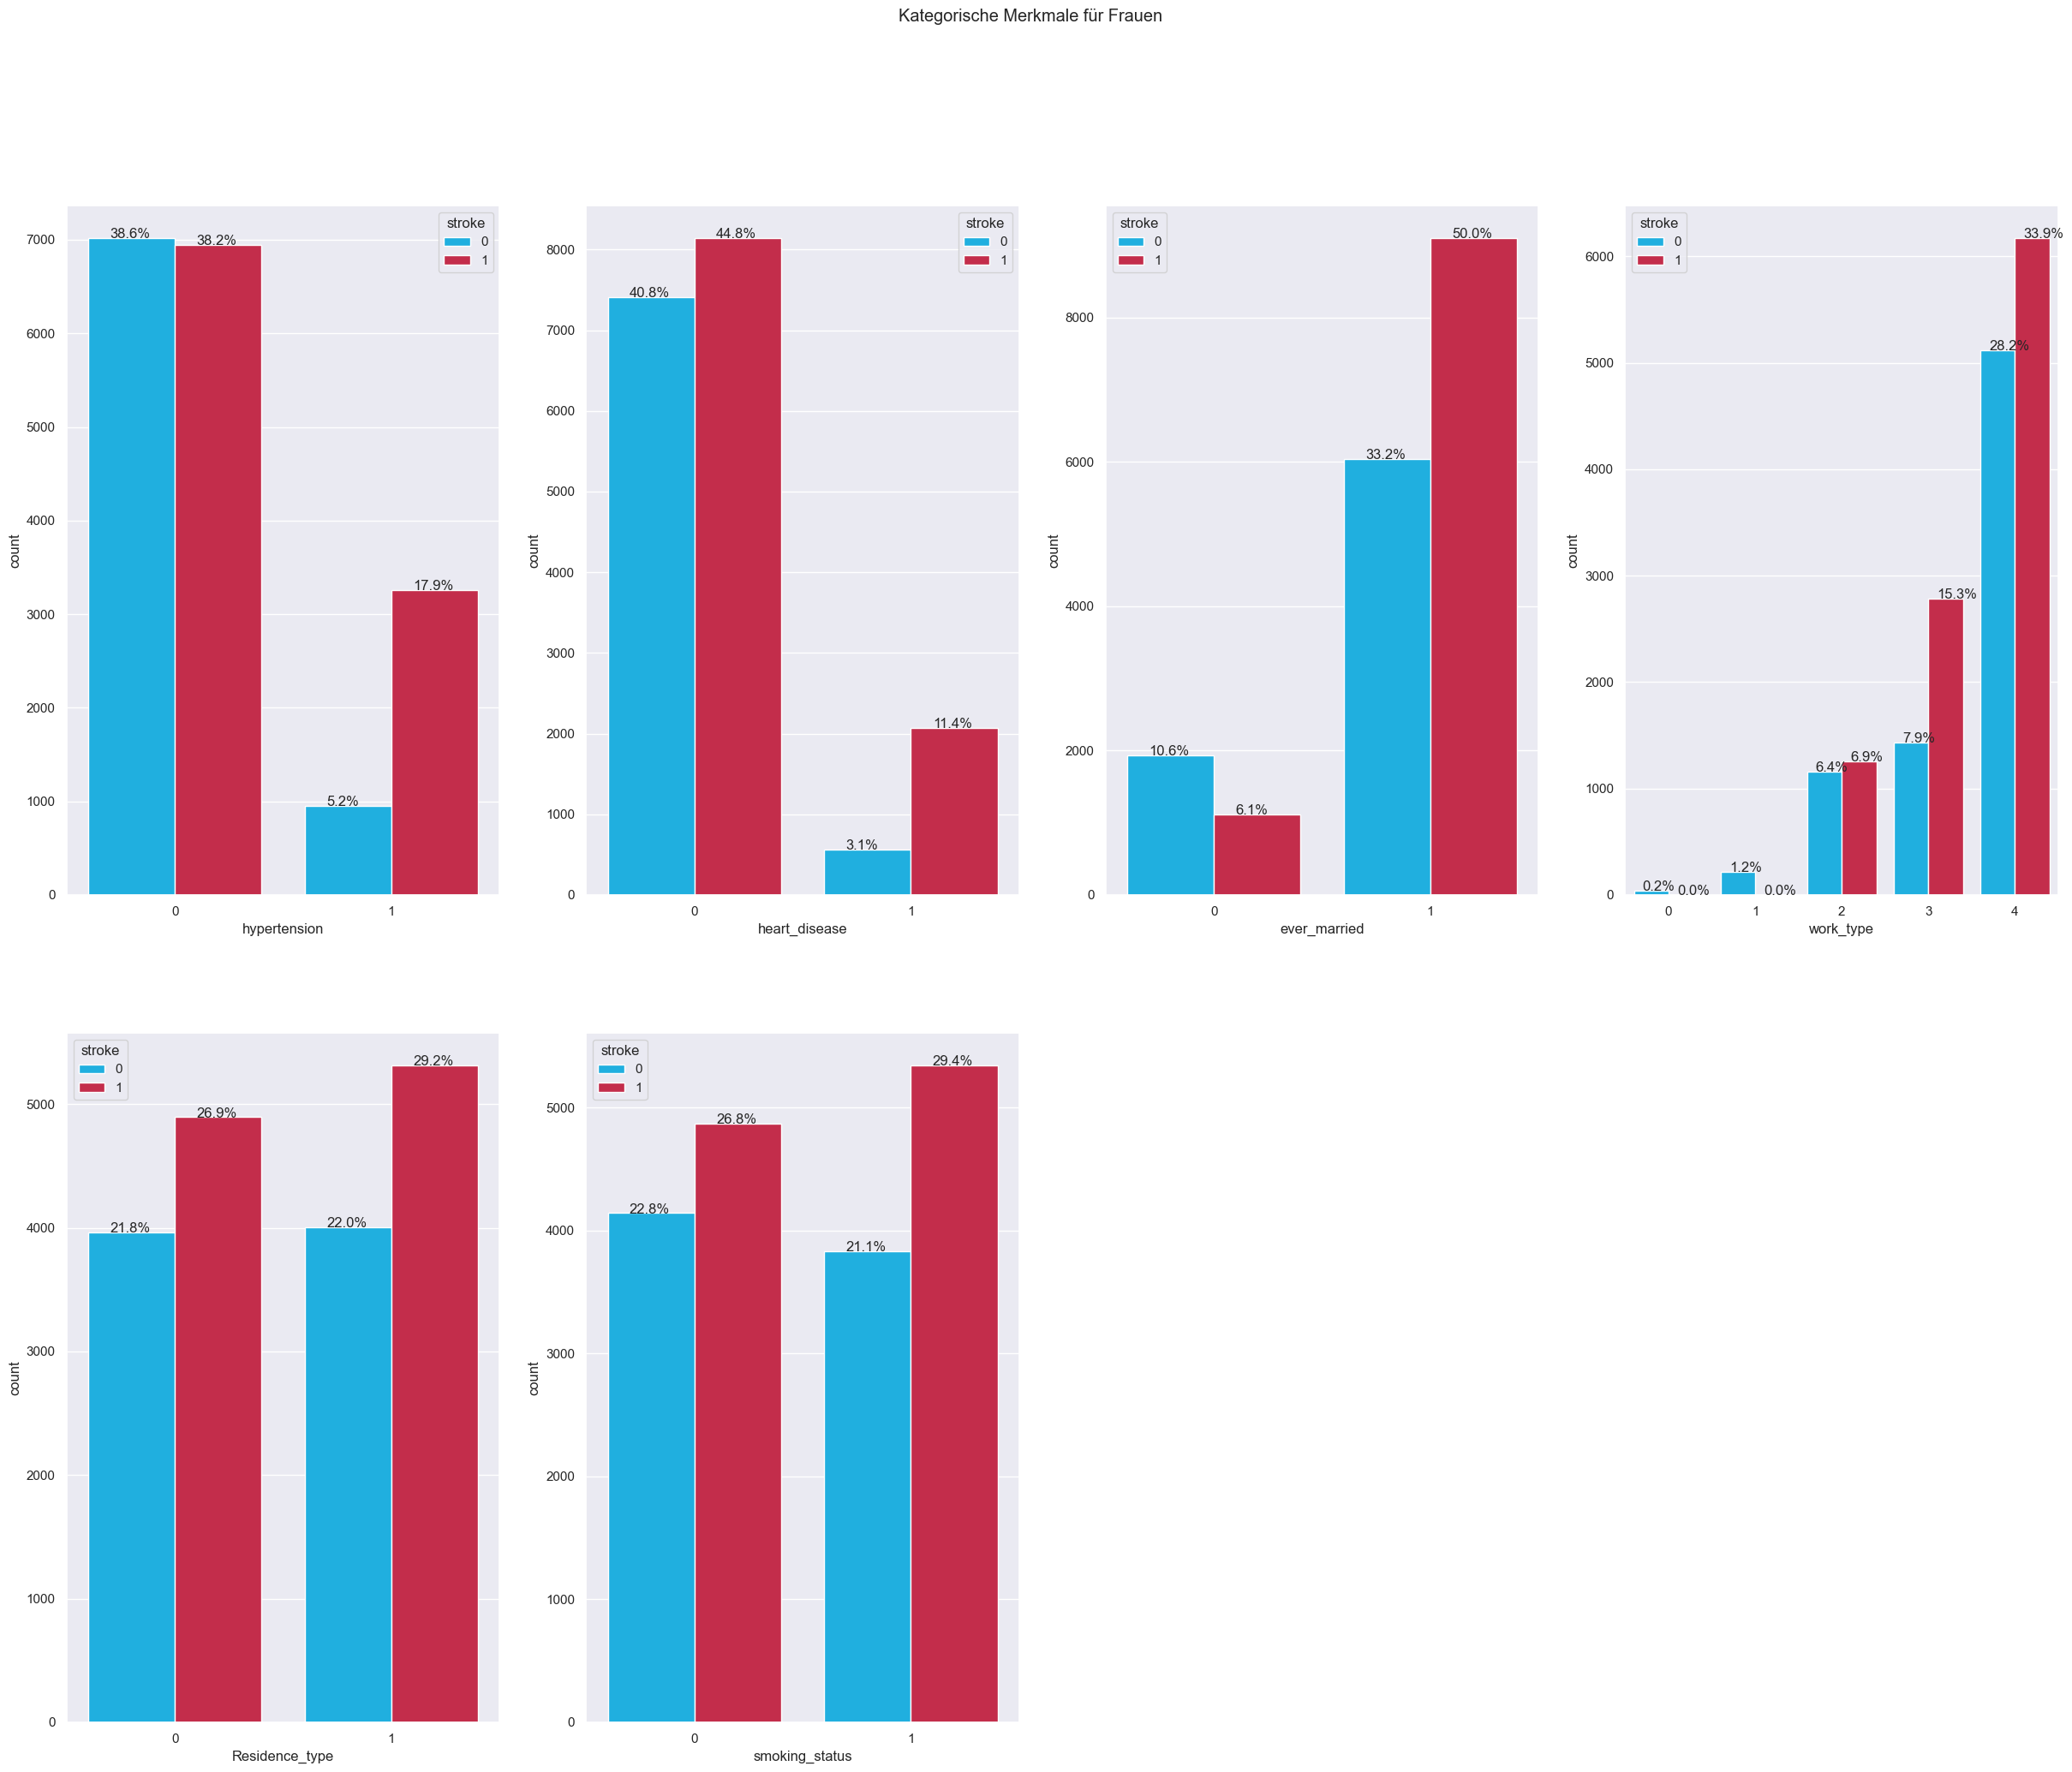

In [52]:
features = [x for x in data_female.columns if x not in ['avg_glucose_level','stroke', 'age', 'bmi']]
plt.figure(figsize = (30,23))
plt.suptitle('Kategorische Merkmale für Frauen')

#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)   
    x = sns.countplot(data=data_female, x=i[1], hue='stroke', palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/data_female.shape[0])*100)+'%',(z.get_x()+0.1, z.get_height()+0.01))

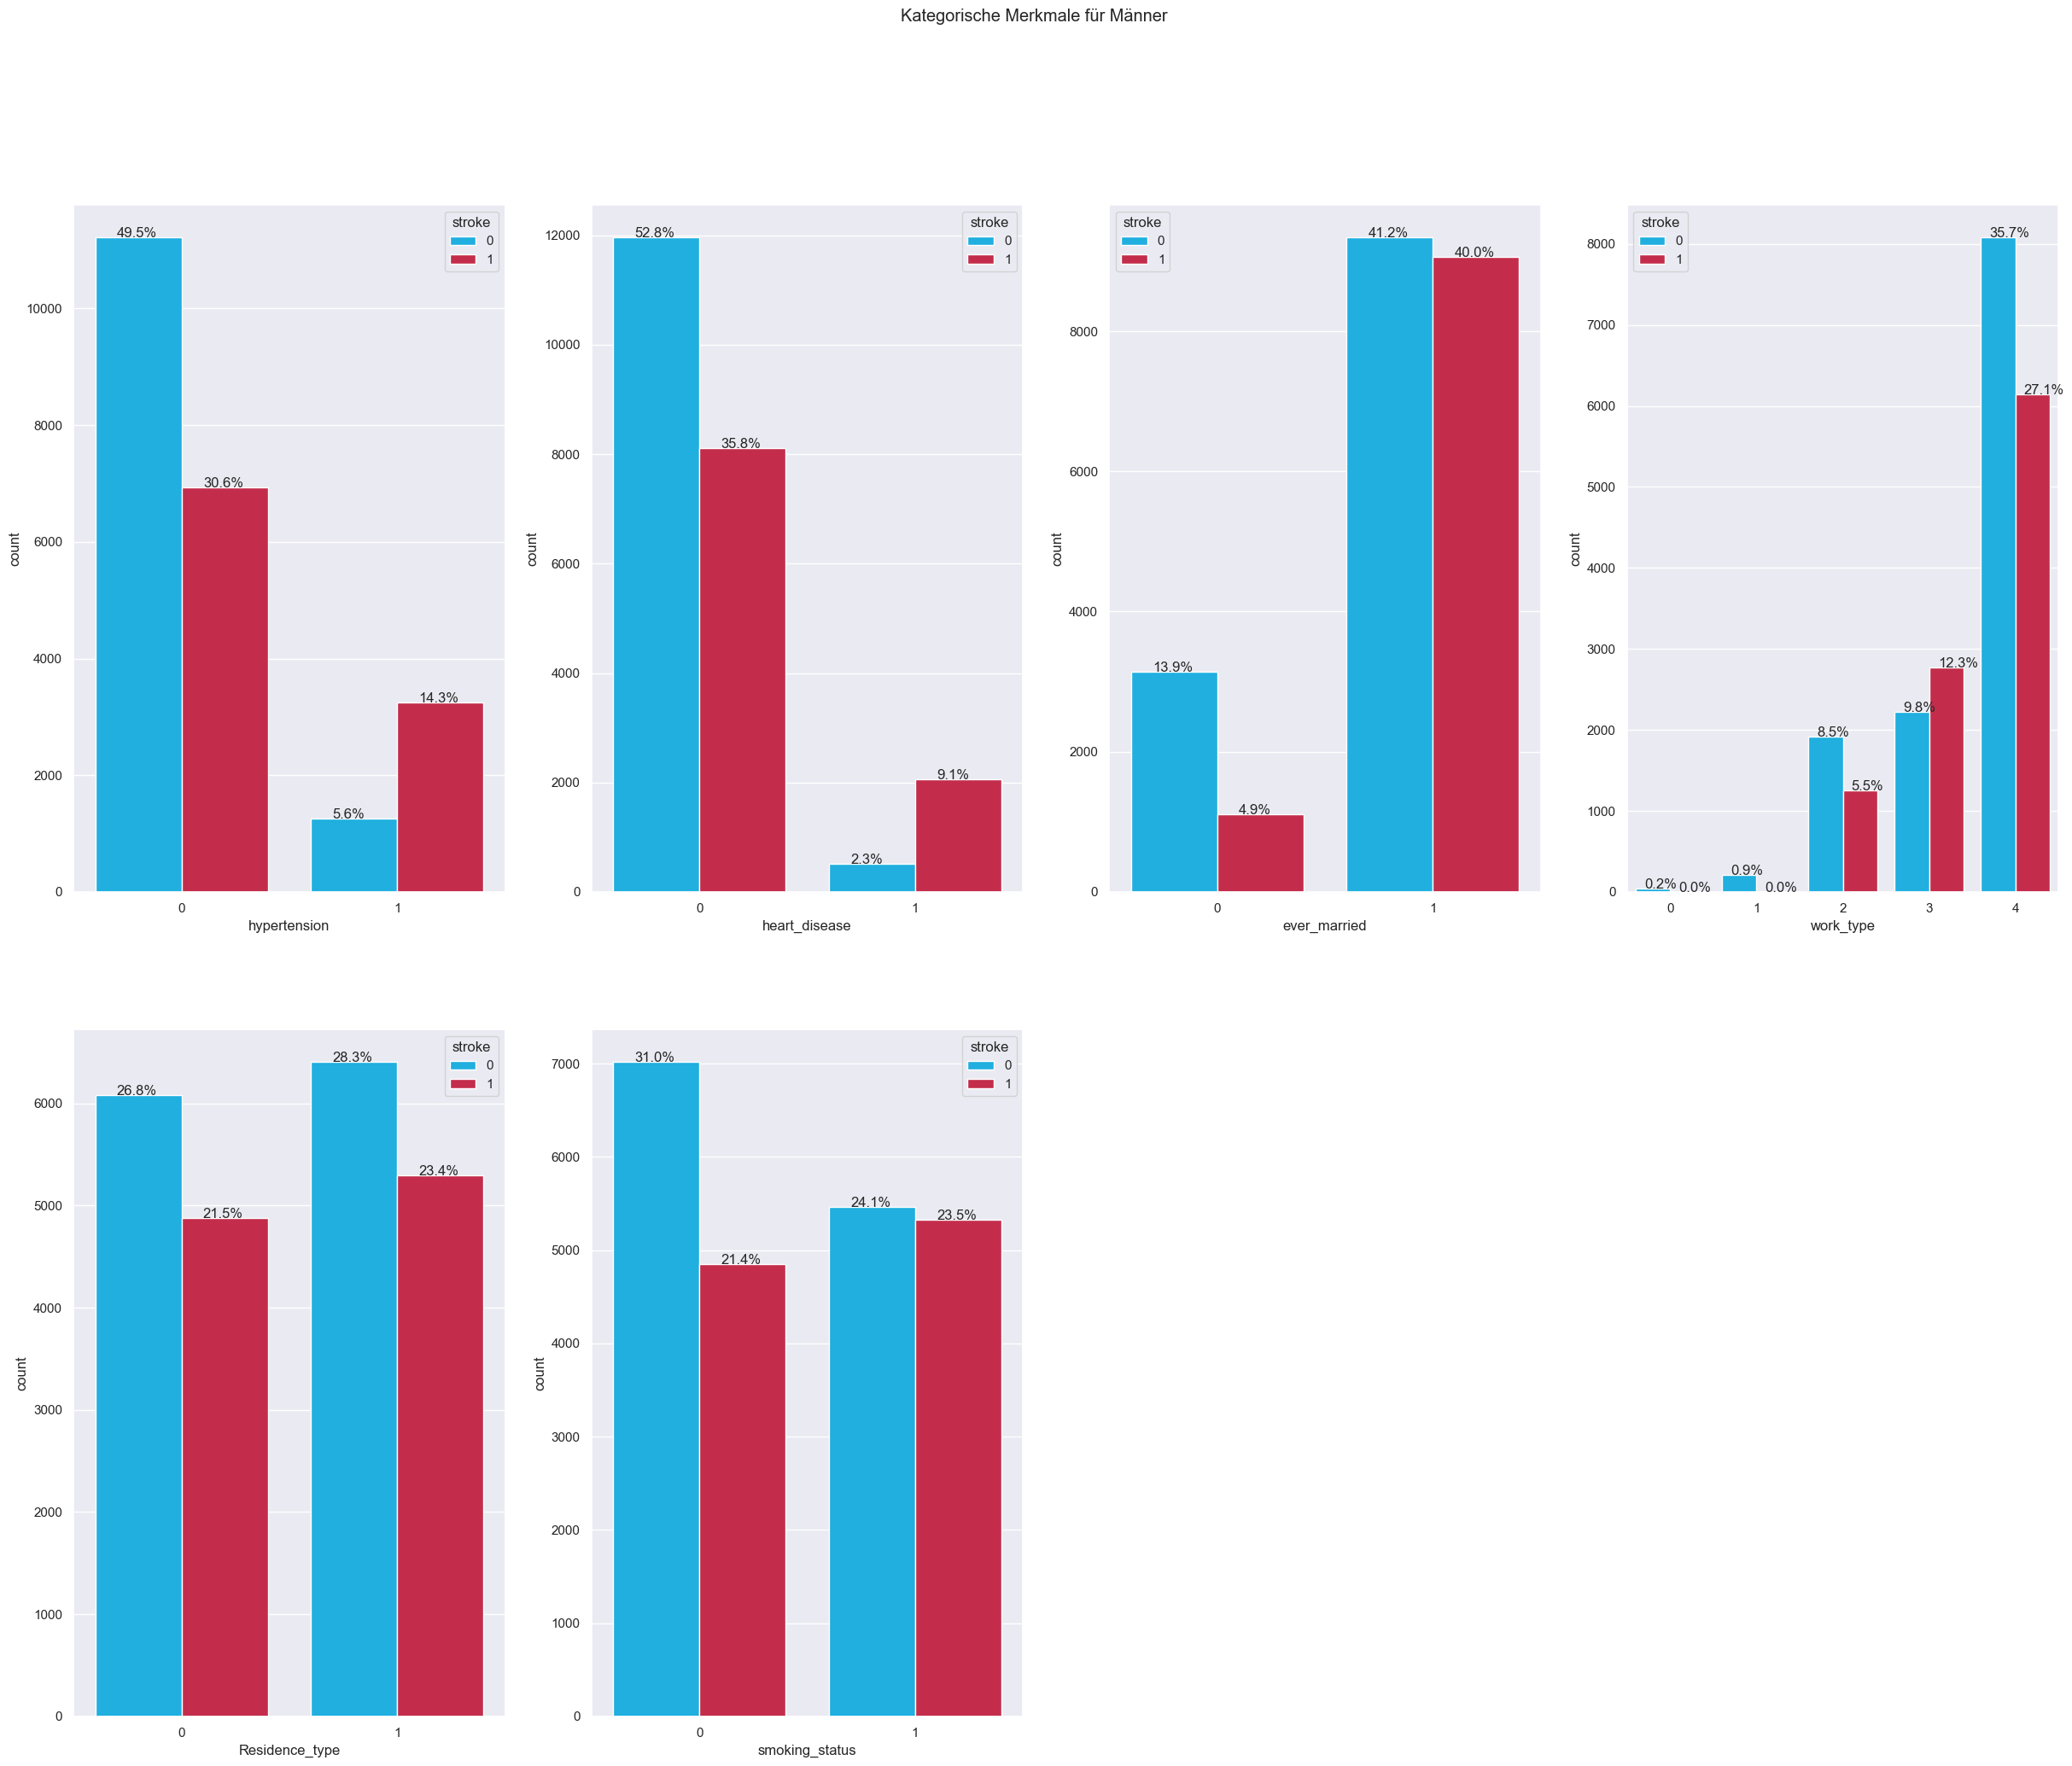

In [53]:
features = [x for x in data_male.columns if x not in ['avg_glucose_level','stroke', 'age', 'bmi']]
plt.figure(figsize = (30,23))
plt.suptitle('Kategorische Merkmale für Männer')

#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)   
    x = sns.countplot(data=data_male, x=i[1], hue='stroke', palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/data_male.shape[0])*100)+'%',(z.get_x()+0.1, z.get_height()+0.01))

In [54]:
#avg_glucose_level sieht ungleich verteilt aus, daher Check nach "Skewness"
data_skew = data[['avg_glucose_level']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

#Verdacht bewahrheitet sich. Daher nun Daten skalieren damit das Modell später besser performt. 

,skew,too_skewed
avg_glucose_level,0.945346,True


In [55]:
#Datenerhebung zu avg_glucose_level ist nicht spezifiziert im Fragebogen bzw. erschließt sich mir nicht. 
#Die Korrelation scheint mit diesem Feature allerdings am höchsten zu sein. 
#Ich verkleinere den Datensatz um dieses Feature erstelle aber eine Kopie ikl. Glukose falls ich später etwas überprüfen möchte
data_withglucose = data.copy()

data = data.drop(columns=['avg_glucose_level'])
print(data_withglucose.shape)
print(data.shape)


(40826, 11)
(40826, 10)


In [56]:
#datensatz in x und y aufteilen, stroke ist die Zielspalte 
X = data.drop('stroke',axis=1)
y = data.loc[:,'stroke']


In [57]:
type(X)

pandas.core.frame.DataFrame

In [58]:
#pre-processing mit StandardScaler um die Werte zu normalisieren. 

#Skalieren der unabhängigen Variablen 
scaler_1 = StandardScaler()
scaler_1.fit(X) 
X_scaled = scaler_1.transform(X)

#Splitten der Daten in Train und Test Daten 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state = 42)

#Splitten der Trainingsdaten in Train- und Validierungdaten
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_pandas = pd.DataFrame(X_train)
X_test_pandas = pd.DataFrame(X_test)
X_val_pandas = pd.DataFrame(X_val)

In [59]:
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print("X_test_type", type(X_test))
print("X_test_pandas_type", type(X_test_pandas))
print("y_test_type", type(y_test))


(40826, 9)
(26128, 9)
(6532, 9)
(8166, 9)
(26128,)
(6532,)
(8166,)
X_test_type <class 'numpy.ndarray'>
X_test_pandas_type <class 'pandas.core.frame.DataFrame'>
y_test_type <class 'pandas.core.series.Series'>


5. Anwendung verschiedener Algorithmen 

Accuracy der Logistischen Regresiion auf den Validierungsdaten: 0.6612063686466626
Accuracy der Logistischen Regresiion auf den Testdaten: 0.6561351947097722


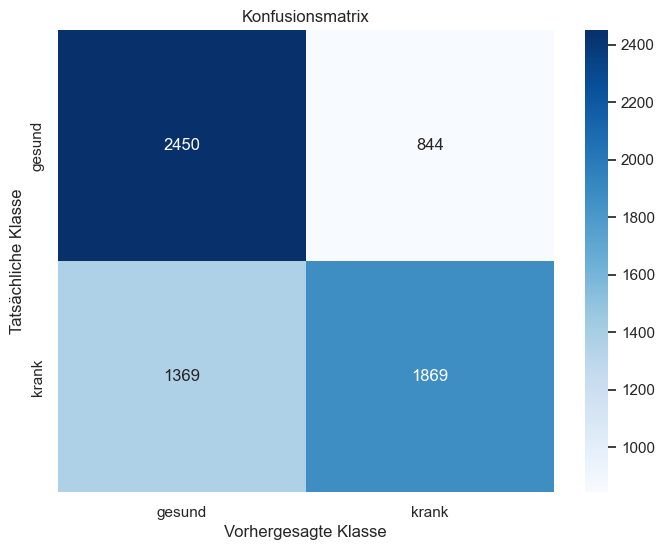

Klassifizierungstabelle:
[[2450  844]
 [1369 1869]]
Koeffizienten der logistischen Regression:
[[-0.20627569  0.09415867  0.55265466  0.43757782  0.37522044  0.04488764
   0.05923767 -0.05444779  0.08094006]]


In [60]:
#Logistische Regression als einfaches statistisches Modell
logreg = LogisticRegression(random_state=42)

#Trainieren auf Trainingsdaten
logreg.fit(X_train, y_train)

#Vorhersage auf Validierungsdaten
y_val_Log_pred = logreg.predict(X_val)

#Berechnen der Accuracy auf den Validierungsdaten
accuracy_Log = accuracy_score(y_val, y_val_Log_pred)
print("Accuracy der Logistischen Regresiion auf den Validierungsdaten:", accuracy_Log)

#Genauigkeit auf den Testdaten
y_test_LOG_pred = logreg.predict(X_test)
test_LOG_accuracy = accuracy_score(y_test, y_test_LOG_pred)
print("Accuracy der Logistischen Regresiion auf den Testdaten:", test_LOG_accuracy)

confusion_matrix_logreg = confusion_matrix(y_val, y_val_Log_pred)
class_names = ['gesund', 'krank']

#Plot der Konfusionsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Konfusionsmatrix')
plt.show()

print("Klassifizierungstabelle:")
print(confusion_matrix_logreg)

#Check welche Gewichte/Koeffizienten wie relevant sind für die Vorhersage
coefficients_logreg = logreg.coef_
print("Koeffizienten der logistischen Regression:")
print(coefficients_logreg)


In [61]:
#Support Vector Classifier 

#Erstellen des Models
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train, y_train)

#Vorhersage/Evaluation auf den Validierungsdaten
y_val_SVC_pred = svc.predict(X_val)
val_SVC_accuracy = accuracy_score(y_val, y_val_SVC_pred)
print("Genauigkeit der SVC auf den Validierungsdaten:", val_SVC_accuracy)

#Vorhersage/Evaluation auf den Testdaten
y_test_SVC_pred = svc.predict(X_test)
test_SVC_accuracy = accuracy_score(y_test, y_test_SVC_pred)
print("Genauigkeit der SVC auf den Testdaten:", test_SVC_accuracy)





Genauigkeit der SVC auf den Validierungsdaten: 0.6604409063074097
Genauigkeit der SVC auf den Testdaten: 0.656747489590987


In [62]:

#Diese Grid Search Optimierung kommentiere ich absichtlich aus. Sie lief letztes Mal > 2 Tage (siehe Kommentar im Bericht)

#Hyperparameteroptimierung für SVC mit Gridsearch


# # Gridsearch Model erstellen
# param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf'],}
# grid_search_SVC = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# #Gridsearch auf den Trainingsdaten
# grid_search_SVC.fit(X_train, y_train)
# print("Beste Hyperparameter:", grid_search_SVC.best_params_)

# #Trainieren des SVC mit den identifizierten besten Parametern
# best_params = grid_search_SVC.best_params_
# best_SVC = SVC(**best_params, random_state=42)
# best_SVC.fit(X_train, y_train)

# y_val_best_SVC_pred = best_SVC.predict(X_val)
# val_best_SVC_accuracy = accuracy_score(y_val, y_val_best_SVC_pred)
# print("Genauigkeit der optimierten SVC auf Validierungsdaten nach Parameteroptimierung:", val_best_SVC_accuracy)

# y_test_best_SVC_pred = best_SVC.predict(X_test)
# test_best_SVC_accuracy = accuracy_score(y_test, y_test_best_SVC_pred)
# print("Genauigkeit der optimierten SVC auf Testdaten nach Parameteroptimierung:", test_best_SVC_accuracy)


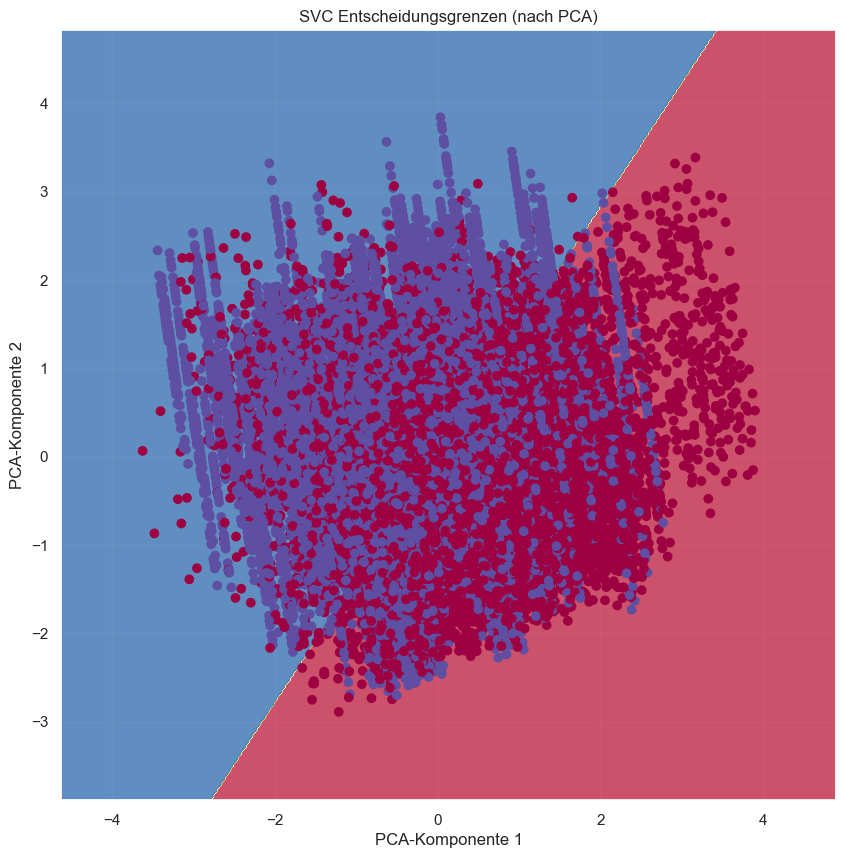

In [63]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Annahme: Du hast neun Merkmale in X_train
# Reduziere die Dimensionen auf zwei mit PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Trainiere das SVC-Modell auf den reduzierten Daten
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train_pca, y_train)

# Meshgrid erstellen
h = .02  # Schrittgröße im Netz
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Vorhersagen für jedes Gitterpunkt machen
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotte die Entscheidungsgrenzen und Datenpunkte
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, cmap=plt.cm.Spectral)
plt.xlabel('PCA-Komponente 1')
plt.ylabel('PCA-Komponente 2')
plt.title('SVC Entscheidungsgrenzen (nach PCA)')
plt.show()


In [64]:
# KNN Classifier als nächste Methode --- ohne Min_Max Skalierung

#Erstellen und Trainieren des Modells
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Vorhersage/Akkuranz auf den Validierungsdaten
y_val_KNN_pred = knn.predict(X_val)
val_KNN_accuracy = accuracy_score(y_val, y_val_KNN_pred)
print("Genauigkeit der KNN auf den Validierungsdaten:", val_KNN_accuracy)

#Vorhersage/Akkuranz auf den Testdaten
y_test_KNN_pred = knn.predict(X_test)
test_KNN_accuracy = accuracy_score(y_test, y_test_KNN_pred)
print("Genauigkeit der KNN auf den Testdaten:", test_KNN_accuracy)


Genauigkeit der KNN auf den Validierungsdaten: 0.7852112676056338
Genauigkeit der KNN auf den Testdaten: 0.7807984325251041


In [65]:
#Perzeptron

#Abändern der Datentypen für y
y_train_numpy = y_train.to_numpy()
y_val_numpy = y_val.to_numpy()
y_test_numpy = y_test.to_numpy()


#Definition der Perzeptron-Klasse
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        #Initialisieren der Gewichtungen und des Schwellenwerts
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                #Vorhersage
                y_pred = np.dot(X[i], self.weights) + self.bias

                #Gewichte aktualisieren mit Fehler
                if y[i] * y_pred <= 0:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]

    def predict(self, X):
        #Vorhersage
        return np.sign(np.dot(X, self.weights) + self.bias)


#Perzeptron initialisieren
perceptron = Perceptron(learning_rate=0.1, n_iterations=1000)
perceptron.fit(X_train, y_train_numpy)

#Vorhersage/Evaluation auf Validierungsdaten
y_val_perc_pred = perceptron.predict(X_val)
val_perc_accuracy = accuracy_score(y_val_numpy, y_val_perc_pred)
print("Genauigkeit Perceptron auf den Validierungsdaten:", val_perc_accuracy)

#Vorhersage/Evaluation auf Testdaten
y_test_perc_pred = perceptron.predict(X_test)
test_perc_accuracy = accuracy_score(y_test_numpy, y_test_perc_pred)
print("Genauigkeit Perceptron auf den Testdaten:", test_perc_accuracy)


Genauigkeit Perceptron auf den Validierungsdaten: 0.4957134109001837
Genauigkeit Perceptron auf den Testdaten: 0.49926524614254225


In [66]:
#Da einfaches Perzeptron eine zu geringe Akkuranz aufweist und das Problem augenscheinlich nicht linear ist  --> besser multi-layer Perzeptron

#Erstellen und trainieren des MLPClassifiers
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)

#Vorhersage/Akkuranz auf den Validierungsdaten
y_val_MLP_pred = mlp_classifier.predict(X_val)
val_MLP_accuracy = accuracy_score(y_val, y_val_MLP_pred)
print("Genauigkeit des MLP Classifiers auf den Validierungsdaten:", val_MLP_accuracy)

#Vorhersage/Akkuranz auf den Testdaten
y_test_MLP_pred = mlp_classifier.predict(X_test)
test_MLP_accuracy = accuracy_score(y_test, y_test_MLP_pred)
print("Genauigkeit des MLP Classifiers auf den Testdaten:", test_MLP_accuracy)

#cross_val_score, um die Genauigkeit für jede Kreuzvalidierungs-Faltung zu berechnen
accuracy_scores = cross_val_score(mlp_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Genauigkeit des MLP Classifiers inkl. Cross-Validation:", accuracy_scores)
mean_accuracy = accuracy_scores.mean()
print("Durchschnittliche Genauigkeit (cross_val_score):", mean_accuracy)



Genauigkeit des MLP Classifiers auf den Validierungsdaten: 0.8651255358236375
Genauigkeit des MLP Classifiers auf den Testdaten: 0.8577026696056821
Genauigkeit des MLP Classifiers inkl. Cross-Validation: [0.83046307 0.85993111 0.86146192 0.85856459 0.8522488 ]
Durchschnittliche Genauigkeit (cross_val_score): 0.8525339002448193


In [67]:
#Check Datentyp
print(type(X_train))
print(type(X_val))
print(type(X_test))
print(type(y_train))
print(type(y_val))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [68]:
# rainings- und Testdaten zu PyTorch-Tensoren umwandeln als Vorbereitung für NN
X_train_tensor = torch.from_numpy(X_train).float()  # float() ist wichtig damit Daten im Fließkommaformat rauskommen
X_val_tensor = torch.from_numpy(X_val).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.tensor(y_train_numpy, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_numpy, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_numpy, dtype=torch.float32)


#Sicherstellen, dass y als 2D-Tensor (Spaltenvektor) vorliegt
y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)
y_test_tensor = y_test_tensor.view(-1, 1)


In [72]:
#Definition des neuronalen Netzwerks
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0])
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size[1], hidden_size[2])
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size[2], output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

#Daten und Modell initialisieren
input_size = 9
hidden_size = (64, 32, 16)
output_size = 1
model_NN = NN(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model_NN.parameters(), lr=0.001)
batch_size = 32  
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


#Training
num_epochs = 50
for epoch in range(num_epochs):
    model_NN.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_NN(inputs.float())
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)

#Auswertungsmodus
model_NN.eval()
with torch.no_grad():
    output = model_NN(X_test_tensor)
y_pred_tensor = (output > 0.5).int()

#Berechnen der Leistungsfähigkeit
accuracy_NN_test = accuracy_score(y_test_tensor, y_pred_tensor)
precision = precision_score(y_test_tensor, y_pred_tensor)
recall = recall_score(y_test_tensor, y_pred_tensor)
f1_score_result = f1_score(y_test_tensor, y_pred_tensor)

print("Accuracy auf Testdaten:", accuracy_NN_test)
print("Precision auf Testdaten:", precision)
print("Recallauf Testdaten:", recall)
print("F1-Score auf Testdaten:", f1_score_result)




Accuracy auf Testdaten: 0.8094538329659564
Precision auf Testdaten: 0.8942758836409134
Recallauf Testdaten: 0.7012509197939661
F1-Score auf Testdaten: 0.7860874346989276


In [73]:
#Hyperparameter-Optimierung mit Random Search
param_dist = {
    'hidden_size': [(32, 16, 8), (64, 32, 16), (128, 64, 32)],
    'learning_rate': [0.0001, 0.001, 0.01],
    'num_epochs': [5, 10, 15, 50, 100]
}

num_random_search_trials = 100
best_accuracy = 0.0
best_hyperparameters = None

for _ in range(num_random_search_trials):
    hyperparameters = {
        'hidden_size': random.choice(param_dist['hidden_size']),
        'learning_rate': random.choice(param_dist['learning_rate']),
        'num_epochs': random.choice(param_dist['num_epochs'])
    }

    #Erstellen des Modells 
    model_NN_RS = NN(input_size, hyperparameters['hidden_size'], output_size)
    optimizer = optim.Adam(model_NN_RS.parameters(), lr=hyperparameters['learning_rate'])

    #Validierungsdaten verwenden und valid_accuracy berechnen
    model_NN_RS.eval()
    with torch.no_grad():
        val_output = model_NN_RS(X_val_tensor)
        val_predictions = (val_output > 0.5).int()
        valid_accuracy = accuracy_score(y_val_tensor.numpy(), val_predictions.numpy())

    if valid_accuracy > best_accuracy:
        best_accuracy = valid_accuracy
        best_hyperparameters = hyperparameters


print("Beste Hyperparameter durch Random Search:")
print(best_hyperparameters)
print("Genauigkeit auf den Validierungsdaten mit den besten Hyperparametern (RS):", best_accuracy)

#Trainieren des Modells mit den besten Hyperparametern (RS)
model_best_RS = NN(input_size, best_hyperparameters['hidden_size'], output_size)
optimizer_best = optim.Adam(model_best_RS.parameters(), lr=best_hyperparameters['learning_rate'])

for epoch in range(best_hyperparameters['num_epochs']):
    model_best_RS.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer_best.zero_grad()
        outputs = model_best_RS(inputs.float())
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer_best.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)

#Auswertungsmodus
model_best_RS.eval()
with torch.no_grad():
    test_outputs = model_best_RS(X_test_tensor.float())
    test_predictions = (test_outputs > 0.5).int()
    test_accuracy = accuracy_score(y_test_tensor.numpy(), test_predictions.numpy())

print("Genauigkeit auf den Testdaten mit den besten Hyperparametern (RS):", test_accuracy)

Beste Hyperparameter durch Random Search:
{'hidden_size': (128, 64, 32), 'learning_rate': 0.001, 'num_epochs': 100}
Genauigkeit auf den Validierungsdaten mit den besten Hyperparametern (RS): 0.5042865890998163
Genauigkeit auf den Testdaten mit den besten Hyperparametern (RS): 0.8562331618907666


In [74]:
#Hyperparameter-Optimierung mit Grid Search
from itertools import product

param_grid = {
    'hidden_size': [(32, 16, 8), (64, 32, 16), (128, 64, 32)],
    'learning_rate': [0.0001, 0.001, 0.01],
    'num_epochs': [5, 10, 15, 50, 100]
}

best_accuracy = 0.0
best_hyperparameters = None

#Durchlaufen verschiedenster Hyperparameter-Kombinationen
for hyperparameters in product(*param_grid.values()):
    hyperparameters_dict = {
        'hidden_size': hyperparameters[0],
        'learning_rate': hyperparameters[1],
        'num_epochs': hyperparameters[2]
    }

    #Initialisieren des Modells
    model_NN_GS = NN(input_size, hyperparameters_dict['hidden_size'], output_size)
    optimizer = optim.Adam(model_NN_GS.parameters(), lr=hyperparameters_dict['learning_rate'])

    #Validierungsdaten anwenden und valid_accuracy berechnen
    model_NN_GS.eval()
    with torch.no_grad():
        val_output = model_NN_GS(X_val_tensor)
        val_predictions = (val_output > 0.5).int()
        valid_accuracy = accuracy_score(y_val_tensor.numpy(), val_predictions.numpy())

    if valid_accuracy > best_accuracy:
        best_accuracy = valid_accuracy
        best_hyperparameters = hyperparameters_dict

print("Beste Hyperparameter durch Grid Search:")
print(best_hyperparameters)
print("Genauigkeit auf den Validierungsdaten mit den besten Hyperparametern (GS):", best_accuracy)

#Trainieren des Modells mit den besten Hyperparametern (GS)
model_best_GS = NN(input_size, best_hyperparameters['hidden_size'], output_size)
optimizer_best = optim.Adam(model_best_GS.parameters(), lr=best_hyperparameters['learning_rate'])

for epoch in range(best_hyperparameters['num_epochs']):
    model_best_GS.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer_best.zero_grad()
        outputs = model_best_GS(inputs.float())
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer_best.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)

#Auswertungsmodus
model_best_GS.eval()
with torch.no_grad():
    test_outputs = model_best_GS(X_test_tensor.float())
    test_predictions = (test_outputs > 0.5).int()
    test_accuracy = accuracy_score(y_test_tensor.numpy(), test_predictions.numpy())

print("Genauigkeit auf den Testdaten mit den besten Hyperparametern (GS):", test_accuracy)


Beste Hyperparameter durch Grid Search:
{'hidden_size': (32, 16, 8), 'learning_rate': 0.0001, 'num_epochs': 5}
Genauigkeit auf den Validierungsdaten mit den besten Hyperparametern (GS): 0.5042865890998163
Genauigkeit auf den Testdaten mit den besten Hyperparametern (GS): 0.6573597844722018


In [97]:
#Wenn ich nun eine Beispielperson aussuche und für diese die Vorhersage eines Schlaganfalls aufgrund meines Neuronalen Netzes NN machen möchte:
#Daten für die Person
age = 35
bmi = 21.9
smoking_status = 0  #Nichtraucherin
gender = 0  #Weiblich
residence_type = 1  #Wohnt in der Stadt
work_type = 4  #Arbeitet im Privatsektor
marital_status = 1  #Nicht verheiratet
heart_disease = 0  #Keine Herzerkrankungen
hypertension = 0 #Kein Bluthochdruck

#Daten in einem Array speichern
new_instance_data = np.array([age, bmi, smoking_status, gender, residence_type, work_type, marital_status, heart_disease, hypertension])

#StandardScaler für standardisierung anwenden 
scaler = StandardScaler()
scaler.fit(X_train)  # Hier sollte X_train die Originaldaten enthalten, nicht die bereits standardisierten
new_instance_data_standardized = scaler.transform([new_instance_data])
new_instance_tensor = torch.FloatTensor(new_instance_data_standardized)

#Instanz für Modell und Vorhersage
model_person = NN(input_size, hidden_size, output_size)
model_person.eval()

with torch.no_grad():
    output = model_person(new_instance_tensor)

#Vorhersage für die Person
prediction = (output > 0.5).int().item()
print("Vorhersage: Schlaganfall ja (1), nein (0):", prediction)


Vorhersage: Schlaganfall ja (1), nein (0): 0
